In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import csv
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_article = pd.read_csv('articles.tsv', sep='\t', header=None, quoting=csv.QUOTE_NONE)
data_summary = pd.read_csv('summaries.tsv', sep='\t', header=None, quoting=csv.QUOTE_NONE)

train_data_article = data_article[0:800]
test_data_article = data_article[800:]
train_data_summary = data_summary[0:800]
test_data_summary = data_summary[800:]

In [3]:
# define my own tokenizer
def my_tokenizer(text):

    # remove illegal words
    text = re.sub(r'[^A-Za-z0-9_#@$% ]','',text)
    # remove urls
    text = re.sub(r'(https?://|www)[^\s]+',' ',text)
    # length >= 2
    return [token for token in text.split() if len(token) >= 2]

In [4]:
# define my own tokenizer
def my_tokenizer2(text):
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    # remove illegal words
    text = re.sub(r'[^A-Za-z0-9_#@$% ]','',text)
    # remove urls
    text = re.sub(r'(https?://|www)[^\s]+',' ',text)
    # length >= 2
    return [ps.stem(token) for token in text.split() if len(token) >= 2 and token not in stop_words]

In [5]:
def evaluation(Y_test, Y_predict):
    num_dec_point = 3

    a_mic = accuracy_score(Y_test, Y_predict)
    p_mic, r_mic, f1_mic, _ = precision_recall_fscore_support(Y_test,
                                                              Y_predict,
                                                              average='micro',
                                                              warn_for=())
    p_mac, r_mac, f1_mac, _ = precision_recall_fscore_support(Y_test,
                                                              Y_predict,
                                                              average='macro',
                                                              warn_for=())
    print('micro acc,prec,rec,f1: ', round(a_mic, num_dec_point), round(
        p_mic, num_dec_point), round(r_mic, num_dec_point), round(f1_mic, num_dec_point), sep="\t")
    print('macro prec,rec,f1: ', round(p_mac, num_dec_point), round(
        r_mac, num_dec_point), round(f1_mac, num_dec_point), sep="\t")

In [6]:
def plot1(Y_test, Y_predict1, Y_predict2):
    a_mic1 = accuracy_score(Y_test, Y_predict1)
    p_mic1, r_mic1, f1_mic1, _ = precision_recall_fscore_support(Y_test,Y_predict1,average='micro',warn_for=())
    p_mac1, r_mac1, f1_mac1, _ = precision_recall_fscore_support(Y_test,Y_predict1,average='macro',warn_for=())
    
    a_mic2 = accuracy_score(Y_test, Y_predict2)
    p_mic2, r_mic2, f1_mic2, _ = precision_recall_fscore_support(Y_test,Y_predict2,average='micro',warn_for=())
    p_mac2, r_mac2, f1_mac2, _ = precision_recall_fscore_support(Y_test,Y_predict2,average='macro',warn_for=())
    
    micro = pd.DataFrame({'model':['a','a','a','a','b','b','b','b'],
                  'Metrics':['accuracy', 'precision', 'recall', 'f1', 'accuracy', 'precision', 'recall', 'f1']})
    micro['Value'] = [a_mic1, p_mic1, r_mic1, f1_mic1, a_mic2, p_mic2, r_mic2, f1_mic2]
    
    macro = pd.DataFrame({'model':['a','a','a','b','b','b'],
                  'Metrics':['precision', 'recall', 'f1', 'precision', 'recall', 'f1']})
    macro['Value'] = [p_mac1, r_mac1, f1_mac1, p_mac2, r_mac2, f1_mac2]

    sns.set(style="dark")

    fig, axes = plt.subplots(1,2,figsize=(12, 5))

    plt.subplot(1,2,1)
    plt.title('Micro Metrics of two DT models (a) and (b)')
    plt.ylim((0,1))
    for a, b in zip([-0.175,0.225,0.825,1.225,1.825,2.225,2.825,3.225], 
                    [micro['Value'][0],micro['Value'][4],micro['Value'][1],micro['Value'][5],
                     micro['Value'][2],micro['Value'][6],micro['Value'][3],micro['Value'][7]]):
        plt.text(a, b+0.02, '%.3f' % b, ha='center', va='bottom', fontsize=10)
    sns.barplot(x = 'Metrics', y = 'Value', data = micro, palette = 'Paired', hue = 'model')

    plt.subplot(1,2,2)
    plt.title('Macro Metrics of two DT models (a) and (b)')
    plt.ylim((0,1))
    for a, b in zip([-0.175,0.225,0.825,1.225,1.825,2.225], 
                    [macro['Value'][0],macro['Value'][3],macro['Value'][1],
                     macro['Value'][4],macro['Value'][2],macro['Value'][5]]):
        plt.text(a, b+0.02, '%.3f' % b, ha='center', va='bottom', fontsize=10)
    sns.barplot(x = 'Metrics', y = 'Value', data = macro, palette = 'Paired', hue = 'model')
    
    return micro, macro

In [7]:
def plot2(Y_test, Y_predict1, Y_predict2, ylim, type):
    a_mic1 = accuracy_score(Y_test, Y_predict1)
    p_mic1, r_mic1, f1_mic1, _ = precision_recall_fscore_support(Y_test,Y_predict1,average='micro',warn_for=())
    p_mac1, r_mac1, f1_mac1, _ = precision_recall_fscore_support(Y_test,Y_predict1,average='macro',warn_for=())
    
    a_mic2 = accuracy_score(Y_test, Y_predict2)
    p_mic2, r_mic2, f1_mic2, _ = precision_recall_fscore_support(Y_test,Y_predict2,average='micro',warn_for=())
    p_mac2, r_mac2, f1_mac2, _ = precision_recall_fscore_support(Y_test,Y_predict2,average='macro',warn_for=())
    
    micro = pd.DataFrame({'model':['a','a','a','a','b','b','b','b'],
                  'Metrics':['accuracy', 'precision', 'recall', 'f1', 'accuracy', 'precision', 'recall', 'f1']})
    micro['Value'] = [a_mic1, p_mic1, r_mic1, f1_mic1, a_mic2, p_mic2, r_mic2, f1_mic2]
    
    macro = pd.DataFrame({'model':['a','a','a','b','b','b'],
                  'Metrics':['precision', 'recall', 'f1', 'precision', 'recall', 'f1']})
    macro['Value'] = [p_mac1, r_mac1, f1_mac1, p_mac2, r_mac2, f1_mac2]

    sns.set(style="dark")

    fig, axes = plt.subplots(1,2,figsize=(12, 5))

    plt.subplot(1,2,1)
    plt.title('Micro Metrics of two ' + type + ' models (a) and (b)')
    plt.ylim((0,ylim))
    for a, b in zip([-0.175,0.225,0.825,1.225,1.825,2.225,2.825,3.225], 
                    [micro['Value'][0],micro['Value'][4],micro['Value'][1],micro['Value'][5],
                     micro['Value'][2],micro['Value'][6],micro['Value'][3],micro['Value'][7]]):
        plt.text(a, b+0.02, '%.3f' % b, ha='center', va='bottom', fontsize=10)
    barplot = sns.barplot(x = 'Metrics', y = 'Value', data = micro, palette = 'Paired', hue = 'model')
    barplot.legend(loc = 0)

    plt.subplot(1,2,2)
    plt.title('Macro Metrics of two ' + type + ' models (a) and (b)')
    plt.ylim((0,ylim))
    for a, b in zip([-0.175,0.225,0.825,1.225,1.825,2.225], 
                    [macro['Value'][0],macro['Value'][3],macro['Value'][1],
                     macro['Value'][4],macro['Value'][2],macro['Value'][5]]):
        plt.text(a, b+0.02, '%.3f' % b, ha='center', va='bottom', fontsize=10)
    barplot = sns.barplot(x = 'Metrics', y = 'Value', data = macro, palette = 'Paired', hue = 'model')
    barplot.legend(loc = 0)
    
    return micro, macro

## Question 1

### 1(i)

In [8]:
X_train, Y_train = train_data_article[1], train_data_article[2]
X_test, Y_test = test_data_article[1], test_data_article[2]

In [9]:
# DT

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=0.01, criterion='entropy', random_state=0)
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

clf2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [10]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.715	0.715	0.715	0.715
macro prec,rec,f1: 	0.709	0.703	0.703
micro acc,prec,rec,f1: 	0.71	0.71	0.71	0.71
macro prec,rec,f1: 	0.702	0.706	0.703


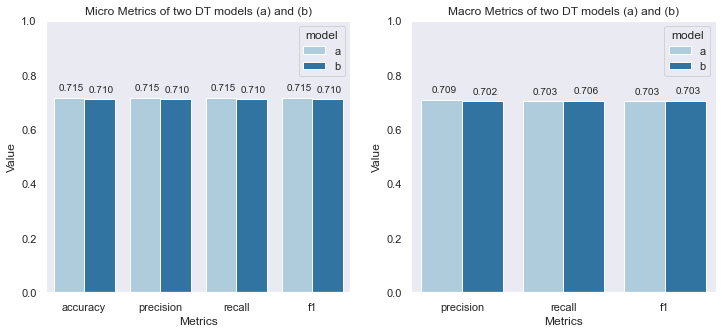

In [11]:
micro, macro = plot1(Y_test, Y_predict1, Y_predict2)

### 1(ii)

In [12]:
X_train, Y_train = train_data_summary[1], train_data_summary[2]
X_test, Y_test = test_data_summary[1], test_data_summary[2]

In [13]:
# DT

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=0.01, criterion='entropy', random_state=0)
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

clf2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [14]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.49	0.49	0.49	0.49
macro prec,rec,f1: 	0.498	0.489	0.488
micro acc,prec,rec,f1: 	0.49	0.49	0.49	0.49
macro prec,rec,f1: 	0.486	0.484	0.485


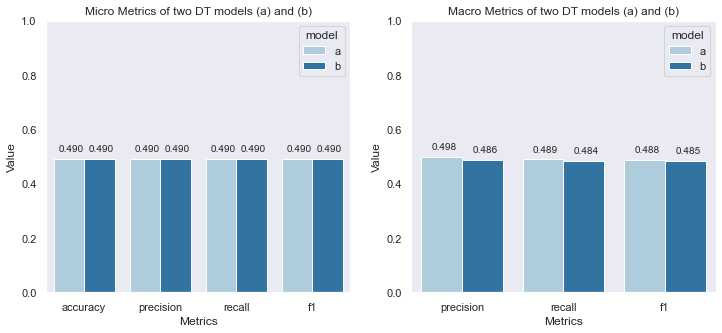

In [15]:
micro, macro = plot1(Y_test, Y_predict1, Y_predict2)

### i(iii)

In [16]:
np.array([len(i) for i in data_article[1]]).mean(), np.array([len(i) for i in data_summary[1]]).mean()

(2221.302, 979.891)

## Question 2

### 2(i)

In [17]:
X_train, Y_train = train_data_article[1], train_data_article[2]
X_test, Y_test = test_data_article[1], test_data_article[2]

In [18]:
# BNB(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = BernoulliNB()
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# BNB(b)-max_features=1000

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf2 = BernoulliNB()
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [19]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.86	0.86	0.86	0.86
macro prec,rec,f1: 	0.898	0.842	0.855
micro acc,prec,rec,f1: 	0.91	0.91	0.91	0.91
macro prec,rec,f1: 	0.907	0.898	0.901


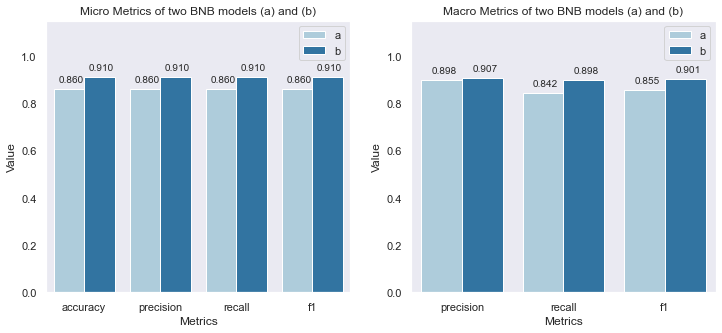

In [20]:
micro, macro = plot2(Y_test, Y_predict1, Y_predict2, 1.15, 'BNB')

In [21]:
# MNB(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = MultinomialNB()
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# MNB(b)-max_features=1000

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf2 = MultinomialNB()
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [22]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.955	0.955	0.955	0.955
macro prec,rec,f1: 	0.954	0.953	0.951
micro acc,prec,rec,f1: 	0.96	0.96	0.96	0.96
macro prec,rec,f1: 	0.955	0.958	0.956


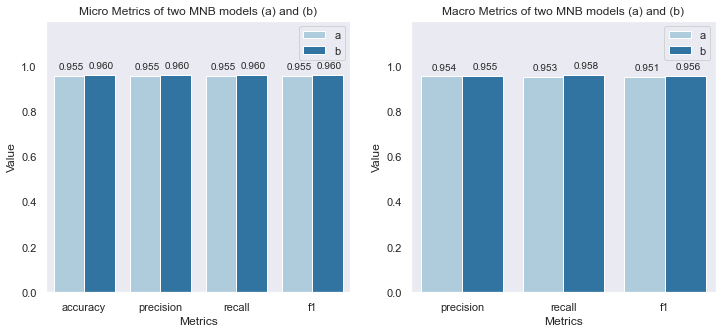

In [23]:
micro, macro = plot2(Y_test, Y_predict1, Y_predict2, 1.1999, 'MNB')

### 2(ii)

In [24]:
X_train, Y_train = train_data_summary[1], train_data_summary[2]
X_test, Y_test = test_data_summary[1], test_data_summary[2]

In [25]:
# BNB(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = BernoulliNB()
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# BNB(b)-max_features=1000

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf2 = BernoulliNB()
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [26]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.745	0.745	0.745	0.745
macro prec,rec,f1: 	0.87	0.713	0.726
micro acc,prec,rec,f1: 	0.86	0.86	0.86	0.86
macro prec,rec,f1: 	0.863	0.852	0.855


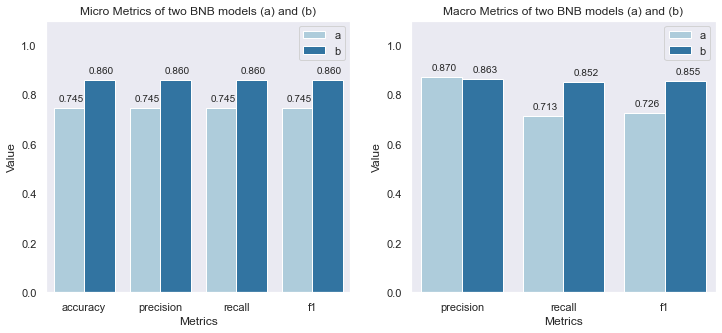

In [27]:
micro, macro = plot2(Y_test, Y_predict1, Y_predict2, 1.1, 'BNB')

In [28]:
# MNB(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = MultinomialNB()
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# MNB(b)-max_features=1000

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf2 = MultinomialNB()
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [29]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.905	0.905	0.905	0.905
macro prec,rec,f1: 	0.91	0.899	0.897
micro acc,prec,rec,f1: 	0.915	0.915	0.915	0.915
macro prec,rec,f1: 	0.912	0.909	0.91


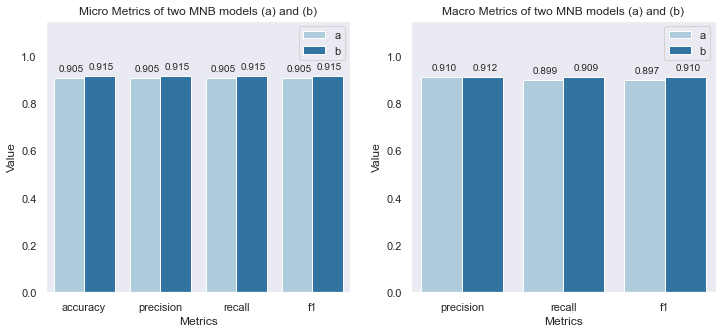

In [30]:
micro, macro = plot2(Y_test, Y_predict1, Y_predict2, 1.15, 'MNB')

## Question 3

### 3(i)(ii)

In [31]:
X_train, Y_train = train_data_article[1], train_data_article[2]
X_test, Y_test = test_data_article[1], test_data_article[2]
# X_train, Y_train = train_data_summary[1], train_data_summary[2]
# X_test, Y_test = test_data_summary[1], test_data_summary[2]

In [32]:
# DT(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=0.01, criterion='entropy', random_state=0)
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# DT(b)-stem + stop_words

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer2, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

clf2 = tree.DecisionTreeClassifier(min_samples_leaf=0.01, criterion='entropy', random_state=0)
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [33]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.715	0.715	0.715	0.715
macro prec,rec,f1: 	0.709	0.703	0.703
micro acc,prec,rec,f1: 	0.745	0.745	0.745	0.745
macro prec,rec,f1: 	0.741	0.728	0.732


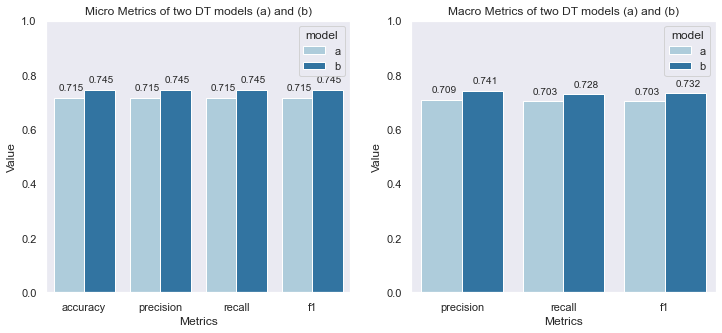

In [34]:
micro, macro = plot1(Y_test, Y_predict1, Y_predict2)

In [35]:
# BNB(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = BernoulliNB()
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# BNB(b)-stem + stop_words

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer2, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf2 = BernoulliNB()
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [36]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.86	0.86	0.86	0.86
macro prec,rec,f1: 	0.898	0.842	0.855
micro acc,prec,rec,f1: 	0.9	0.9	0.9	0.9
macro prec,rec,f1: 	0.926	0.888	0.898


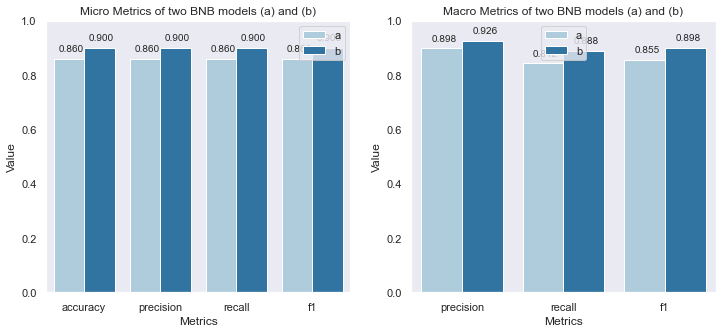

In [37]:
micro, macro = plot2(Y_test, Y_predict1, Y_predict2, 1, 'BNB')

In [38]:
# MNB(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = MultinomialNB()
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# MNB(b)-stem + stop_words

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer2, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf2 = MultinomialNB()
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [39]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.955	0.955	0.955	0.955
macro prec,rec,f1: 	0.954	0.953	0.951
micro acc,prec,rec,f1: 	0.98	0.98	0.98	0.98
macro prec,rec,f1: 	0.977	0.981	0.979


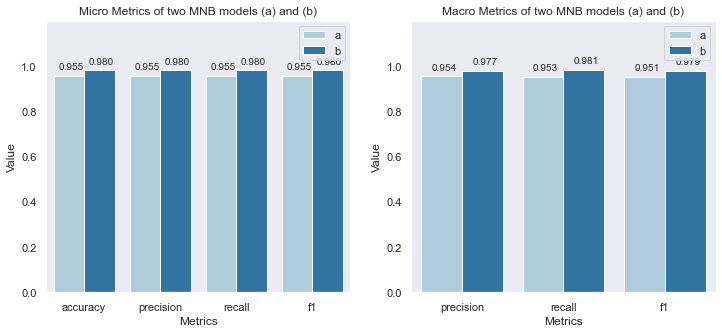

In [40]:
micro, macro = plot2(Y_test, Y_predict1, Y_predict2, 1.1999, 'MNB')

## Question 4

### 4(i)(ii)

In [41]:
X_train, Y_train = train_data_article[1], train_data_article[2]
X_test, Y_test = test_data_article[1], test_data_article[2]
# X_train, Y_train = train_data_summary[1], train_data_summary[2]
# X_test, Y_test = test_data_summary[1], test_data_summary[2]

In [42]:
# DT(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=0.01, criterion='entropy', random_state=0)
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# DT(b)-convert to lower case

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, max_features = 1000)
X_train_bag_of_words = count.fit_transform(X_train)

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

clf2 = tree.DecisionTreeClassifier(min_samples_leaf=0.01, criterion='entropy', random_state=0)
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [43]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.715	0.715	0.715	0.715
macro prec,rec,f1: 	0.709	0.703	0.703
micro acc,prec,rec,f1: 	0.71	0.71	0.71	0.71
macro prec,rec,f1: 	0.713	0.697	0.698


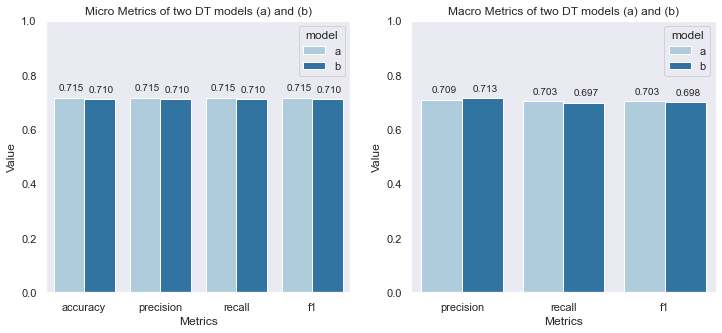

In [44]:
micro, macro = plot1(Y_test, Y_predict1, Y_predict2)

In [45]:
# BNB(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = BernoulliNB()
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# BNB(b)-convert to lower case

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf2 = BernoulliNB()
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [46]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.86	0.86	0.86	0.86
macro prec,rec,f1: 	0.898	0.842	0.855
micro acc,prec,rec,f1: 	0.87	0.87	0.87	0.87
macro prec,rec,f1: 	0.905	0.855	0.867


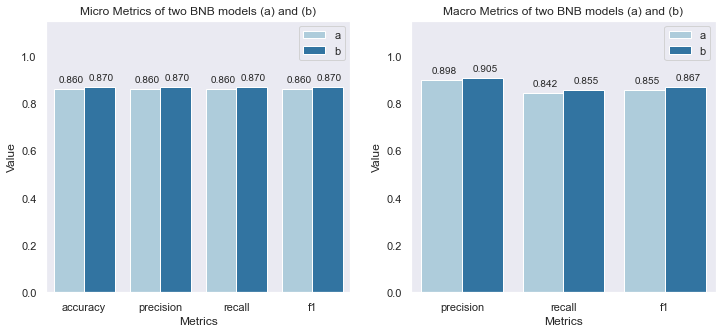

In [47]:
micro, macro = plot2(Y_test, Y_predict1, Y_predict2, 1.15, 'BNB')

In [48]:
# MNB(a)

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf1 = MultinomialNB()
clf1.fit(X_train_bag_of_words, Y_train)
Y_predict1 = clf1.predict(X_test_bag_of_words)

# MNB(b)-convert to lower case

# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer)
X_train_bag_of_words = count.fit_transform(X_train)
# len(count.get_feature_names())

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf2 = MultinomialNB()
clf2.fit(X_train_bag_of_words, Y_train)
Y_predict2 = clf2.predict(X_test_bag_of_words)

In [49]:
# print(classification_report(Y_test, Y_predict1))
evaluation(Y_test, Y_predict1)
evaluation(Y_test, Y_predict2)

micro acc,prec,rec,f1: 	0.955	0.955	0.955	0.955
macro prec,rec,f1: 	0.954	0.953	0.951
micro acc,prec,rec,f1: 	0.965	0.965	0.965	0.965
macro prec,rec,f1: 	0.963	0.963	0.962


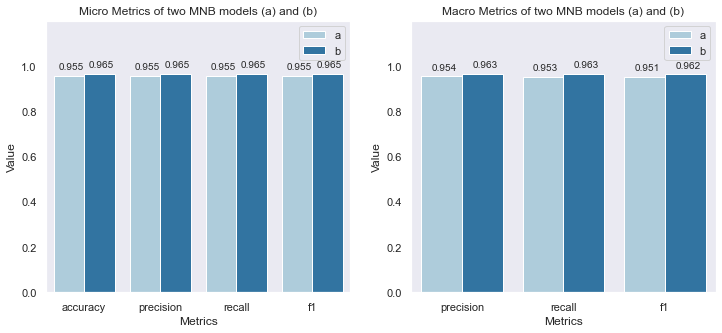

In [50]:
micro, macro = plot2(Y_test, Y_predict1, Y_predict2, 1.1999, 'MNB')

## Question5

In [51]:
X_train, Y_train = train_data_article[1], train_data_article[2]
X_test, Y_test = test_data_article[1], test_data_article[2]
# X_train, Y_train = train_data_summary[1], train_data_summary[2]
# X_test, Y_test = test_data_summary[1], test_data_summary[2]

In [52]:
# create count vectorizer and fit it with training data
count = CountVectorizer(tokenizer=my_tokenizer2, lowercase=False)
X_train_bag_of_words = count.fit_transform(X_train)

# transform the test data into bag of words creaed with fit_transform
X_test_bag_of_words = count.transform(X_test)

# build the model
clf = MLPClassifier(hidden_layer_sizes=(80, ),activation = 'tanh',solver='adam',random_state = 0)
clf.fit(X_train_bag_of_words, Y_train)
Y_predict = clf.predict(X_test_bag_of_words)

In [53]:
# print(classification_report(Y_test, Y_predict))
evaluation(Y_test, Y_predict)

micro acc,prec,rec,f1: 	0.985	0.985	0.985	0.985
macro prec,rec,f1: 	0.985	0.984	0.985


<AxesSubplot:title={'center':'Metrics of my classifier'}>

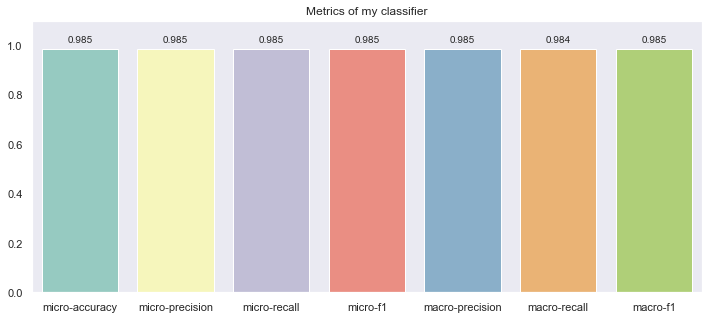

In [54]:
plt.figure(figsize=(12,5))
plt.title('Metrics of my classifier')
plt.ylim((0,1.1))
for a, b in zip([0,1,2,3,4,5,6], 
                [0.985,0.985,0.985,0.985,0.985,0.984,0.985]):
    plt.text(a, b+0.02, '%.3f' % b, ha='center', va='bottom', fontsize=10)
sns.barplot(x = ['micro-accuracy', 'micro-precision', 'micro-recall', 'micro-f1',
                 'macro-precision', 'macro-recall', 'macro-f1'], y = [0.985,0.985,0.985,0.985,0.985,0.984,0.985], palette = 'Set3')